In [4]:
!pip install scikit-learn


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score

import matplotlib.pyplot as plt
import sklearn 
%matplotlib inline

In [2]:
income = pd.read_csv('adult_income.csv')

# DATASET DISCRYPTION

In [3]:
income.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [4]:
income.shape

(32561, 15)

In [5]:
income.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object

In [6]:
income.columns = income.columns.str.replace('.','_')


c:\python 37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


# DATA CLEANING

In [7]:
income.duplicated().sum()

24

In [8]:
income.drop_duplicates(inplace=True)


In [9]:
income.duplicated().sum()

0

In [115]:
income.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

# DATA WRANGLING

In [116]:
income['income_map'] = income.income.map({'<=50K':0, '>50K': 1})
income['sex_map'] = income.sex.map({'Female':0, 'Male':1})
income['race_map']=income.race.map({'White':0, 'Black':1, 
                                    'Asian-Pac-Islander':2, 'Amer-Indian-Eskimo':3})
income['marital_map'] = income.marital_status.map({'Widowed':0, 'Divorced':1, 'Separated':2,
                                                  'Never-married':3, 'Married-civ-spouse':4,
                                                  'Married-spouse-absent':5, 'Married-AF-spouse':6})
income['rel_map']=income.relationship.map({'Not-in-family':0, 'Unmarried':0, 
                                           'Own-child':0, 'Other-relative':0, 
                                           'Husband':1, 'Wife':1})
income['work_map']=income.workclass.map({'?':0, 'Private':1, 'State-gov':2, 'Federal-gov':3, 
                                        'Self-emp-not-inc':4, 'Self-emp-inc': 5, 'Local-gov': 6,
                                        'Without-pay':7, 'Never-worked':8})

# DATA CLEANING

In [117]:
income.isnull().sum()

age                 0
workclass           0
fnlwgt              0
education           0
education_num       0
marital_status      0
occupation          0
relationship        0
race                0
sex                 0
capital_gain        0
capital_loss        0
hours_per_week      0
native_country      0
income              0
income_map          0
sex_map             0
race_map          271
marital_map         0
rel_map             0
work_map            0
dtype: int64

In [118]:
income['race_map'].fillna(income['race_map'].mean(), inplace = True)


In [119]:
income.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
income_map        0
sex_map           0
race_map          0
marital_map       0
rel_map           0
work_map          0
dtype: int64

In [120]:
data.duplicated().sum()

0

In [ ]:
# Data Reduction

In [74]:
# we have removed categorical values
data = income[['age', 'sex_map', 'race_map','education_num', 'work_map', 
            'marital_map', 'rel_map', 'hours_per_week','capital_gain', 'capital_loss', 
            'fnlwgt', 'income_map']].copy()
data

,age,sex_map,race_map,education_num,work_map,marital_map,rel_map,hours_per_week,capital_gain,capital_loss,fnlwgt,income_map
0,90,0,0.0,9,0,0,0,40,0,4356,77053,0
1,82,0,0.0,9,1,0,0,18,0,4356,132870,0
2,66,0,1.0,10,0,0,0,40,0,4356,186061,0
3,54,0,0.0,4,1,1,0,40,0,3900,140359,0
4,41,0,0.0,10,1,2,0,40,0,3900,264663,0
...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,1,0.0,10,1,3,0,40,0,0,310152,0
32557,27,0,0.0,12,1,4,1,38,0,0,257302,0
32558,40,1,0.0,9,1,4,1,40,0,0,154374,1
32559,58,0,0.0,9,1,0,0,40,0,0,151910,0


In [75]:
data.isnull().sum()

age               0
sex_map           0
race_map          0
education_num     0
work_map          0
marital_map       0
rel_map           0
hours_per_week    0
capital_gain      0
capital_loss      0
fnlwgt            0
income_map        0
dtype: int64

In [76]:
data.duplicated().sum()

61

In [77]:
data.drop_duplicates(inplace=True)


In [78]:
data.duplicated().sum()

0

# Data Visualizing

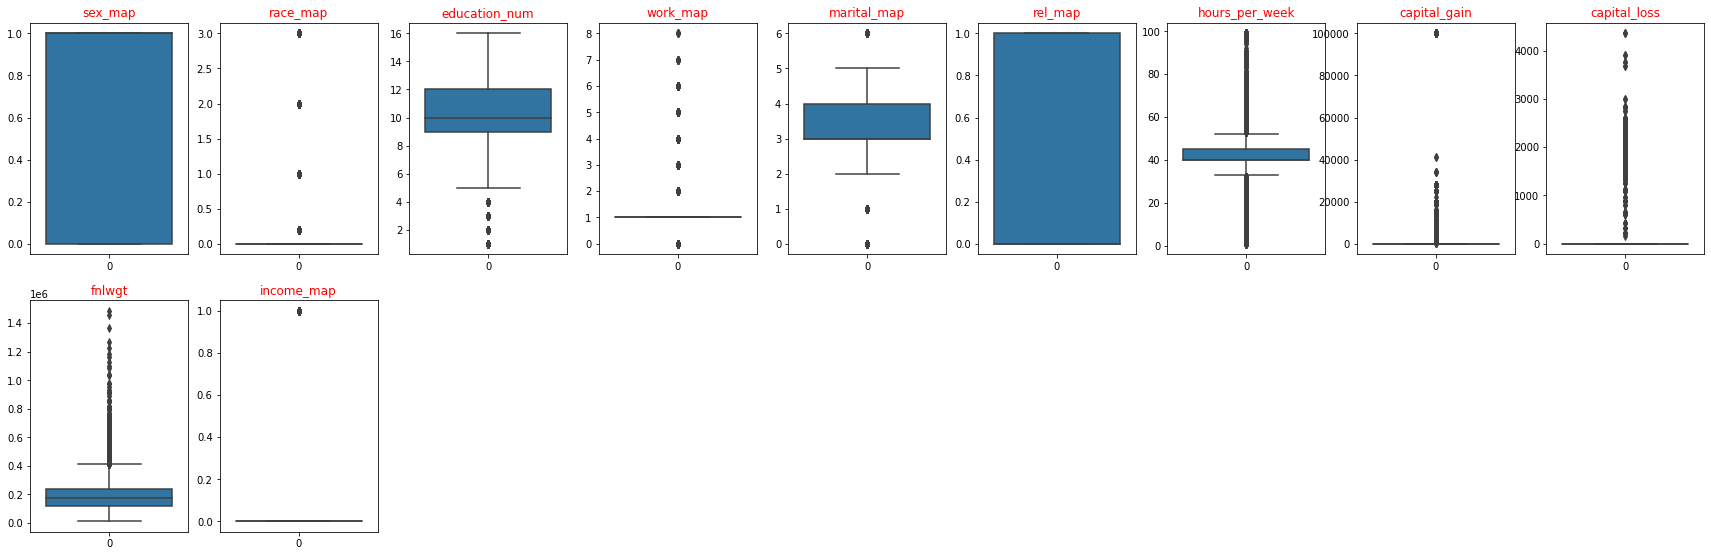

In [79]:
fig = plt.figure(figsize=(30,40))
cols = data.columns
for i in range(len(cols)):
    if i > 0:
        ax = fig.add_subplot(8, 9, i)
        sns.boxplot(data=data[cols[i]])
        ax.set_title(data.columns[i], color='red')
plt.show()

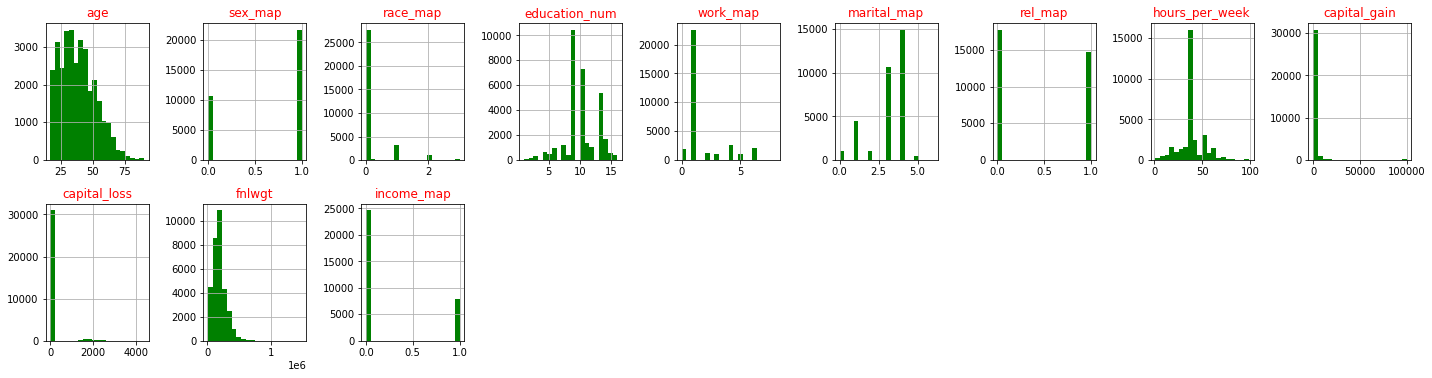

In [80]:
fig = plt.figure(figsize=(20,20))
for i, feature in enumerate(data.columns):
    ax = fig.add_subplot(8, 9, i+1)
    data[feature].hist(bins=20, ax=ax, facecolor='green')
    ax.set_title(feature, color='red')
    fig.tight_layout()
plt.show()

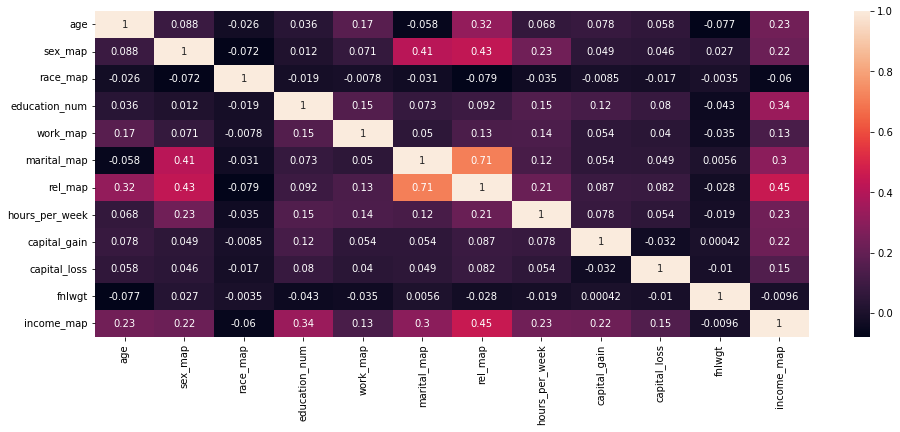

In [81]:
plt.figure(figsize=(16, 6))
sns.heatmap(data.corr(), annot=True)
plt.show()

In [82]:
corrdf = pd.DataFrame(columns = ['Dependent Variable', 'Feature','Correlation']);
# Loop through all the Features in scope
df1 = data['income_map'];
for j in data.iloc[:,1:18].columns:
    df2 = data[j];
    c = df1.corr(df2);
    # Add the computed Correlation to the Data Frame
    corrdf = corrdf.append({'Dependent Variable':'Price','Feature':j, 'Correlation':c}, ignore_index = True);
corrdf

,Dependent Variable,Feature,Correlation
0,Price,sex_map,0.216049
1,Price,race_map,-0.060312
2,Price,education_num,0.335502
3,Price,work_map,0.128033
4,Price,marital_map,0.296989
5,Price,rel_map,0.448339
6,Price,hours_per_week,0.229603
7,Price,capital_gain,0.223395
8,Price,capital_loss,0.150478
9,Price,fnlwgt,-0.009648


# Train & Split Data

In [83]:
X = data.drop('income_map', axis=1)
y = data['income_map']

In [84]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

# GaussianNB

In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
# dataset = pd.read_csv("heart.csv")

# instantiate the model (using the default parameters)
ganb = GaussianNB(priors=[0.5, 0.5])

# fit the model with data
ganb.fit(X_train,y_train)

GaussianNB(priors=[0.5, 0.5])

In [104]:

# instantiate the model (using the default parameters)
ganb = GaussianNB(priors=[0.5, 0.5])

# fit the model with data
ganb.fit(X_train,y_train)

GaussianNB(priors=[0.5, 0.5])

In [87]:
#predicting the output for out test set
y_pred=ganb.predict(X_test)
y_pred

array([0, 1, 0, ..., 1, 0, 0], dtype=int64)

The accuracy is79.04914398324917%
[[5824  318]
 [1383  594]]
              precision    recall  f1-score   support

     class 0       0.81      0.95      0.87      6142
     class 1       0.65      0.30      0.41      1977

    accuracy                           0.79      8119
   macro avg       0.73      0.62      0.64      8119
weighted avg       0.77      0.79      0.76      8119



c:\python 37\lib\site-packages\sklearn\metrics\_ranking.py:951: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


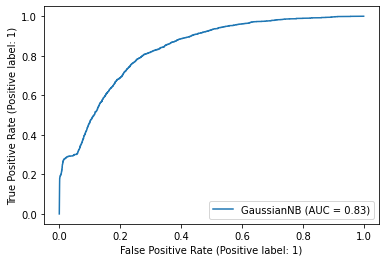

In [88]:
model = ganb.fit(X_train, y_train)
Y_pred = model.predict(X_test)
print("The accuracy is"+str(metrics.accuracy_score(y_test,Y_pred)*100)+"%")
print(confusion_matrix(y_test, Y_pred))
target_names = ['class 0', 'class 1']
print(classification_report(y_test, Y_pred,
target_names=target_names))
fpr, tpr, thresholds = metrics.roc_curve(y_test, Y_pred,pos_label=2)
metrics.plot_roc_curve(model, X_test, y_test)
plt.show()

In [89]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(ganb, X_train, y_train, cv = 10, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.79392447 0.80254516 0.78489327 0.79474548 0.79597701 0.7955665
 0.78858785 0.78644764 0.78850103 0.80287474]


In [90]:
print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Average cross-validation score: 0.7934


In [91]:
# withoout priors

In [92]:

# instantiate the model (using the default parameters)
ganb = GaussianNB()

# fit the model with data
ganb.fit(X_train,y_train)

GaussianNB()

The accuracy is79.18462864884837%
[[5838  304]
 [1386  591]]
              precision    recall  f1-score   support

     class 0       0.81      0.95      0.87      6142
     class 1       0.66      0.30      0.41      1977

    accuracy                           0.79      8119
   macro avg       0.73      0.62      0.64      8119
weighted avg       0.77      0.79      0.76      8119



c:\python 37\lib\site-packages\sklearn\metrics\_ranking.py:951: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


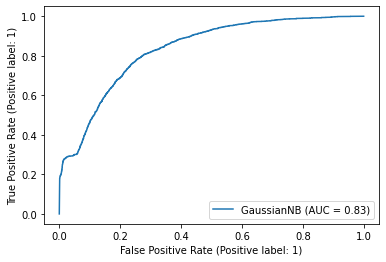

In [93]:
model = ganb.fit(X_train, y_train)
Y_pred = model.predict(X_test)
print("The accuracy is"+str(metrics.accuracy_score(y_test,Y_pred)*100)+"%")
print(confusion_matrix(y_test, Y_pred))
target_names = ['class 0', 'class 1']
print(classification_report(y_test, Y_pred,
target_names=target_names))
fpr, tpr, thresholds = metrics.roc_curve(y_test, Y_pred,pos_label=2)
metrics.plot_roc_curve(model, X_test, y_test)
plt.show()

In [94]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(ganb, X_train, y_train, cv = 10, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.79474548 0.80582923 0.78817734 0.79679803 0.79885057 0.79638752
 0.79269294 0.78809035 0.79301848 0.80451745]


In [95]:
print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Average cross-validation score: 0.7959


# BernoulliNB()

In [96]:
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
bnb =BernoulliNB()

# fit the model with data
bnb.fit(X_train,y_train)

BernoulliNB()

The accuracy is73.74060844931641%
[[4569 1573]
 [ 559 1418]]
              precision    recall  f1-score   support

     class 0       0.89      0.74      0.81      6142
     class 1       0.47      0.72      0.57      1977

    accuracy                           0.74      8119
   macro avg       0.68      0.73      0.69      8119
weighted avg       0.79      0.74      0.75      8119



c:\python 37\lib\site-packages\sklearn\metrics\_ranking.py:951: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


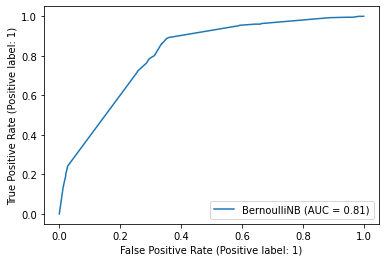

In [97]:
model = bnb.fit(X_train, y_train)
Y_pred = model.predict(X_test)
print("The accuracy is"+str(metrics.accuracy_score(y_test,Y_pred)*100)+"%")
print(confusion_matrix(y_test, Y_pred))
target_names = ['class 0', 'class 1']
print(classification_report(y_test, Y_pred,
target_names=target_names))
fpr, tpr, thresholds = metrics.roc_curve(y_test, Y_pred,pos_label=2)
metrics.plot_roc_curve(model, X_test, y_test)
plt.show()

In [98]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(bnb, X_train, y_train, cv = 10, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.73604269 0.75533662 0.72947455 0.74712644 0.73234811 0.71674877
 0.7364532  0.73963039 0.74209446 0.80328542]


In [99]:
print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Average cross-validation score: 0.7439


# MultinomialNB

In [100]:
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
mnb =MultinomialNB()

# fit the model with data
mnb.fit(X_train,y_train)

MultinomialNB()

The accuracy is78.15001847518167%
[[5875  267]
 [1507  470]]
              precision    recall  f1-score   support

     class 0       0.80      0.96      0.87      6142
     class 1       0.64      0.24      0.35      1977

    accuracy                           0.78      8119
   macro avg       0.72      0.60      0.61      8119
weighted avg       0.76      0.78      0.74      8119



c:\python 37\lib\site-packages\sklearn\metrics\_ranking.py:951: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


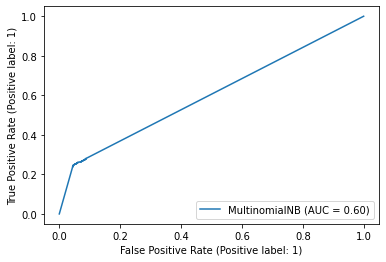

In [101]:
model = mnb.fit(X_train, y_train)
Y_pred = model.predict(X_test)
print("The accuracy is"+str(metrics.accuracy_score(y_test,Y_pred)*100)+"%")
print(confusion_matrix(y_test, Y_pred))
target_names = ['class 0', 'class 1']
print(classification_report(y_test, Y_pred,
target_names=target_names))
fpr, tpr, thresholds = metrics.roc_curve(y_test, Y_pred,pos_label=2)
metrics.plot_roc_curve(model, X_test, y_test)
plt.show()

In [102]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(bnb, X_train, y_train, cv = 10, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.73604269 0.75533662 0.72947455 0.74712644 0.73234811 0.71674877
 0.7364532  0.73963039 0.74209446 0.80328542]


In [103]:
print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Average cross-validation score: 0.7439


In [91]:
# conclusion gaussian naive base is better

# StackingClassifier

In [121]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier
from mlxtend.classifier import StackingClassifier
import numpy as np
import warnings
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier

warnings.simplefilter('ignore')


from sklearn.model_selection import train_test_split
X = data.drop('income_map', axis=1)
y = data['income_map']
RANDOM_SEED = 0
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=RANDOM_SEED)

In [129]:


clf1 =  GaussianNB()
clf2 = RandomForestClassifier(random_state=RANDOM_SEED)
clf3 = SVC(random_state=RANDOM_SEED)
lr = LogisticRegression()


sclf = StackingClassifier(classifiers=[clf1, clf2, clf3],
                          meta_classifier=lr)


# Learn to predict each class against the other
classifier = OneVsRestClassifier(sclf)

The accuracy is84.82925919014741%
[[7495  583]
 [1043 1597]]
              precision    recall  f1-score   support

     class 0       0.88      0.93      0.90      8078
     class 1       0.73      0.60      0.66      2640

    accuracy                           0.85     10718
   macro avg       0.81      0.77      0.78     10718
weighted avg       0.84      0.85      0.84     10718



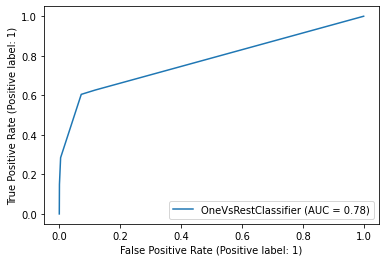

In [130]:
model = classifier.fit(X_train, y_train)
Y_pred = model.predict(X_test)
print("The accuracy is"+str(metrics.accuracy_score(y_test,Y_pred)*100)+"%")
print(confusion_matrix(y_test, Y_pred))
target_names = ['class 0', 'class 1']
print(classification_report(y_test, Y_pred,
target_names=target_names))
fpr, tpr, thresholds = metrics.roc_curve(y_test, Y_pred,pos_label=2)
metrics.plot_roc_curve(model, X_test, y_test)
plt.show()

In [131]:
def mean_relative_error(y_test,y_pred):
    error = 0
    n=len(y_test)
    for i in range(n):
        error += (abs(y_pred[i]-y_test[i-1][0])/y_test[i-1][0])
    return error/n

In [132]:
import sklearn.metrics as sm
y_pred_train =classifier.predict(X_train)
print("Mean absolute error =", round(sm.mean_absolute_error(y_train,y_pred_train), 2))
print("Mean squared error =", round(sm.mean_squared_error(y_train,y_pred_train), 2))

Mean absolute error = 0.0
Mean squared error = 0.0


In [105]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(classifier, X_train, y_train, cv = 10, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.86238532 0.84816514 0.85091743 0.85091743 0.86238532 0.84495413
 0.85045872 0.84449541 0.85412844 0.86002754]


In [106]:
print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Average cross-validation score: 0.8529
